### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

## Assignment template

### Scenario
You are a data analyst working for Turtle Games, a game manufacturer and retailer. They manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand: 
- how customers accumulate loyalty points (Week 1)
- how useful are remuneration and spending scores data (Week 2)
- can social data (e.g. customer reviews) be used in marketing campaigns (Week 3)
- what is the impact on sales per product (Week 4)
- the reliability of the data (e.g. normal distribution, Skewness, Kurtosis) (Week 5)
- if there is any possible relationship(s) in sales between North America, Europe, and global sales (Week 6).

# Week 1 assignment: Linear regression using Python
The marketing department of Turtle Games prefers Python for data analysis. As you are fluent in Python, they asked you to assist with data analysis of social media data. The marketing department wants to better understand how users accumulate loyalty points. Therefore, you need to investigate the possible relationships between the loyalty points, age, remuneration, and spending scores. Note that you will use this data set in future modules as well and it is, therefore, strongly encouraged to first clean the data as per provided guidelines and then save a copy of the clean data for future use.

## Instructions
1. Load and explore the data.
    1. Create a new DataFrame (e.g. reviews).
    2. Sense-check the DataFrame.
    3. Determine if there are any missing values in the DataFrame.
    4. Create a summary of the descriptive statistics.
2. Remove redundant columns (`language` and `platform`).
3. Change column headings to names that are easier to reference (e.g. `renumeration` and `spending_score`).
4. Save a copy of the clean DataFrame as a CSV file. Import the file to sense-check.
5. Use linear regression and the `statsmodels` functions to evaluate possible linear relationships between loyalty points and age/renumeration/spending scores to determine whether these can be used to predict the loyalty points.
    1. Specify the independent and dependent variables.
    2. Create the OLS model.
    3. Extract the estimated parameters, standard errors, and predicted values.
    4. Generate the regression table based on the X coefficient and constant values.
    5. Plot the linear regression and add a regression line.
6. Include your insights and observations.

## 1. Load and explore the data

In [228]:
#Import the necessary packages.
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.stats.api as sms
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re

from sklearn import linear_model
from sklearn import datasets 
from sklearn import linear_model
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.formula.api import ols
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
nltk.download('punkt')
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('omw-1.4')
from wordcloud import WordCloud
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob

import warnings 
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Phoebe\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Phoebe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Phoebe\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Phoebe\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [229]:
# Import the data.
reviews = pd.read_csv('turtle_reviews.csv')

# View the output.
print(reviews.info())
reviews.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB
None


,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap


In [230]:
# Any missing values?
reviews.isnull().sum()

gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64

In [231]:
# Descriptive statistics.
reviews.describe()

,age,remuneration (k£),spending_score (1-100),loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


## 2. Drop columns

In [232]:
# Drop unnecessary columns.
reviews = reviews.drop(['language', 'platform'], axis=1)

# View column names.
reviews.head()

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


## 3. Rename columns

In [233]:
# Rename the column headers.
reviews = reviews.rename(columns={'remuneration (k£)' : 'renumeration', 'spending_score (1-100)' : 'spending_score'})

# View column names.
reviews.head()

,gender,age,renumeration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


## 4. Save the DataFrame as a CSV file

In [234]:
# Create a CSV file as output.
reviews.to_csv('clean_reviews.csv', index=False)

In [235]:
# Import new CSV file with Pandas.
clean_reviews = pd.read_csv('clean_reviews.csv')
print(clean_reviews.info())

# View DataFrame.
clean_reviews.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   renumeration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB
None


,gender,age,renumeration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [236]:
# View correlation.
clean_reviews.corr()['loyalty_points']

# Renumeration and spending could have correlations to loyalty points.

age              -0.042445
renumeration      0.616065
spending_score    0.672310
loyalty_points    1.000000
product           0.183600
Name: loyalty_points, dtype: float64

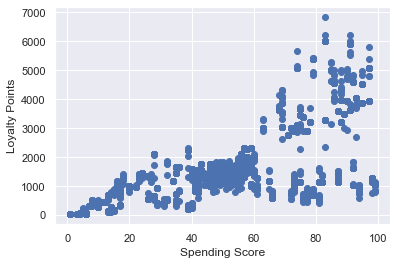

In [237]:
plt.scatter(clean_reviews['spending_score'], clean_reviews['loyalty_points'])
plt.xlabel('Spending Score')
plt.ylabel('Loyalty Points')
plt.show()

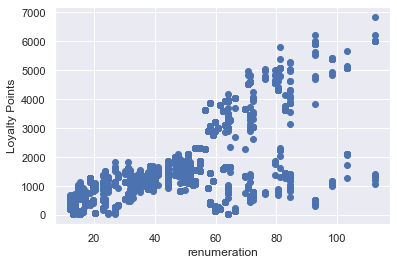

In [238]:
plt.scatter(clean_reviews['renumeration'], clean_reviews['loyalty_points'])
plt.xlabel('renumeration')
plt.ylabel('Loyalty Points')
plt.show()

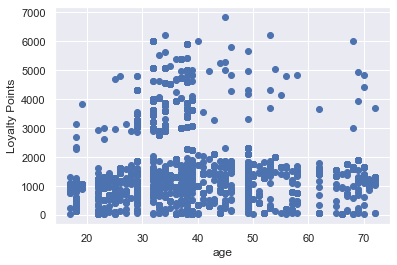

In [239]:
plt.scatter(clean_reviews['age'], clean_reviews['loyalty_points'])
plt.xlabel('age')
plt.ylabel('Loyalty Points')
plt.show()

#### Check distribution of age, renumeration, and spending_score.

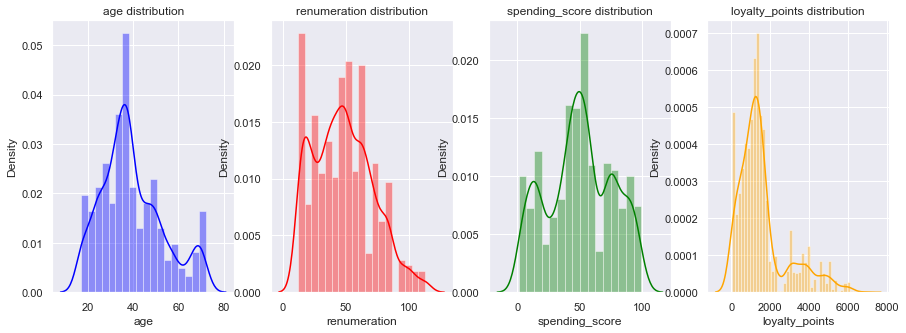

In [240]:
# Check distribution of age, renumeration, and spending_score.

# Create subplots.
f, axes = plt.subplots(1, 4, figsize=(15, 5))

# Plot Histogram plot for age.
sns.distplot(clean_reviews["age"] , color="blue", ax=axes[0])

# Plot Histogram plot for renumeration.
sns.distplot(clean_reviews["renumeration"] , color="red", ax=axes[1])

# Plot Histogram plot for spending_score.
sns.distplot(clean_reviews["spending_score"] , color="green", ax=axes[2])

# Plot Histogram plot for loyalty_points
sns.distplot(clean_reviews["loyalty_points"] , color="orange", ax=axes[3])


a = axes[0].set_title('age distribution')
b = axes[1].set_title('renumeration distribution')
c = axes[2].set_title('spending_score distribution')
d = axes[3].set_title('loyalty_points distribution')

## 5. Linear regression

### 5a) spending vs loyalty

In [241]:
# Independent variable.
X = clean_reviews[['spending_score']]

# Dependent variable.
y = clean_reviews['loyalty_points']

# Create the linear regression model
model = sm.OLS(y, sm.add_constant(X)).fit()

# Extract the estimated parameters
params = model.params
print('Intercept:', params[0])
print('Slope:', params[1])

# Extract the standard errors
bse = model.bse
print('Intercept standard error:', bse[0])
print('Slope standard error:', bse[1])

# Extract the predicted values
new_X = sm.add_constant(pd.DataFrame({'x': [10, 20, 30]})) # new values of X to predict
predictions = model.predict(new_X)
print('Predicted values:', predictions)

# Print the regression table
print(model.summary())

Intercept: -75.05266293364741
Slope: 33.061693258672946
Intercept standard error: 45.93055405556941
Slope standard error: 0.8144185085135347
Predicted values: 0    255.564270
1    586.181202
2    916.798135
dtype: float64
                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Sun, 23 Apr 2023   Prob (F-statistic):          2.92e-263
Time:                        03:48:19   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                              

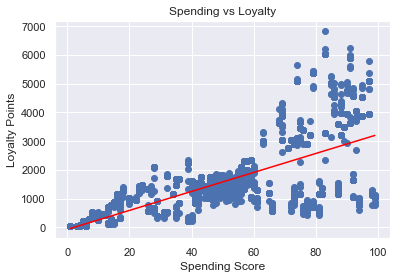

In [242]:
# Plot the scatter plot.
plt.scatter(X, y)
plt.xlabel('Spending Score')
plt.ylabel('Loyalty Points')

# Add the regression line.
x_vals = [X.min(), X.max()]
y_vals = [params[0] + params[1]*x_vals[0], params[0] + params[1]*x_vals[1]]
plt.plot(x_vals, y_vals, color='red')

plt.title('Spending vs Loyalty')
plt.show()

### 5b) renumeration vs loyalty

In [243]:
# Independent variable.
X = clean_reviews[['renumeration']]

# Dependent variable.
y = clean_reviews['loyalty_points']

# Create the linear regression model
model = sm.OLS(y, sm.add_constant(X)).fit()

# Extract the estimated parameters
params = model.params
print('Intercept:', params[0])
print('Slope:', params[1])

# Extract the standard errors
bse = model.bse
print('Intercept standard error:', bse[0])
print('Slope standard error:', bse[1])

# Extract the predicted values
new_X = sm.add_constant(pd.DataFrame({'x': [10, 20, 30]})) # new values of X to predict
predictions = model.predict(new_X)
print('Predicted values:', predictions)

# Print the regression table
print(model.summary())



Intercept: -65.68651279500497
Slope: 34.18782548566891
Intercept standard error: 52.17071742983612
Slope standard error: 0.9779254568320983
Predicted values: 0    276.191742
1    618.069997
2    959.948252
dtype: float64
                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Sun, 23 Apr 2023   Prob (F-statistic):          2.43e-209
Time:                        03:48:19   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                               

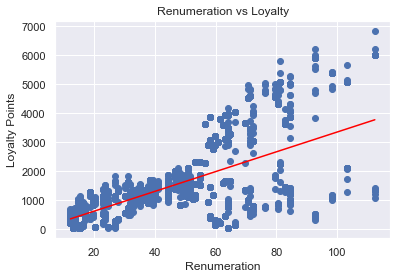

In [244]:
# Plot the scatter plot.
plt.scatter(X, y)
plt.xlabel('Renumeration')
plt.ylabel('Loyalty Points')

# Add the regression line.
x_vals = [X.min(), X.max()]
y_vals = [params[0] + params[1]*x_vals[0], params[0] + params[1]*x_vals[1]]
plt.plot(x_vals, y_vals, color='red')

plt.title('Renumeration vs Loyalty')
plt.show()

### 5c) age vs loyalty

In [245]:
# Independent variable.
X = clean_reviews[['age']]

# Dependent variable.
y = clean_reviews['loyalty_points']

# Create the linear regression model
model = sm.OLS(y, sm.add_constant(X)).fit()

# Extract the estimated parameters
params = model.params
print('Intercept:', params[0])
print('Slope:', params[1])

# Extract the standard errors
bse = model.bse
print('Intercept standard error:', bse[0])
print('Slope standard error:', bse[1])

# Extract the predicted values
new_X = sm.add_constant(pd.DataFrame({'x': [10, 20, 30]})) # new values of X to predict
predictions = model.predict(new_X)
print('Predicted values:', predictions)

# Print the regression table
print(model.summary())



Intercept: 1736.517739399062
Slope: -4.01280514999525
Intercept standard error: 88.24873115454392
Slope standard error: 2.1131768876430823
Predicted values: 0    1696.389688
1    1656.261636
2    1616.133585
dtype: float64
                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Sun, 23 Apr 2023   Prob (F-statistic):             0.0577
Time:                        03:48:19   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                             

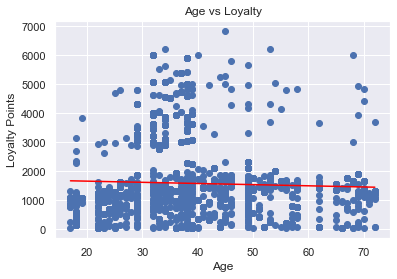

In [246]:
# Plot the scatter plot.
plt.scatter(X, y)
plt.xlabel('Age')
plt.ylabel('Loyalty Points')

# Add the regression line.
x_vals = [X.min(), X.max()]
y_vals = [params[0] + params[1]*x_vals[0], params[0] + params[1]*x_vals[1]]
plt.plot(x_vals, y_vals, color='red')

plt.title('Age vs Loyalty')
plt.show()

### NOTES:
There are correlations between renumeration and loyalty points. And there are correlations between spending score and loyalty points. These can be used to determine how customers accumulate loyalty points. 

# 

# Week 2 assignment: Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. You are tasked to identify groups within the customer base that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

## Instructions
1. Prepare the data for clustering. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame (e.g. `df2`) containing the `renumeration` and `spending_score` columns.
    3. Explore the new DataFrame. 
2. Plot the renumeration versus spending score.
    1. Create a scatterplot.
    2. Create a pairplot.
3. Use the Silhouette and Elbow methods to determine the optimal number of clusters for *k*-means clustering.
    1. Plot both methods and explain how you determine the number of clusters to use.
    2. Add titles and legends to the plot.
4. Evaluate the usefulness of at least three values for *k* based on insights from the Elbow and Silhoutte methods.
    1. Plot the predicted *k*-means.
    2. Explain which value might give you the best clustering.
5. Fit a final model using your selected value for *k*.
    1. Justify your selection and comment on the respective cluster sizes of your final solution.
    2. Check the number of observations per predicted class.
6. Plot the clusters and interpret the model.

## 1. Load and explore the data

In [247]:
#Import the necessary packages.
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.stats.api as sms
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model
from sklearn import datasets 
from sklearn import linear_model
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.formula.api import ols
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline  

import warnings 
warnings.filterwarnings('ignore')

# Import the data.
df2 = pd.read_csv('clean_reviews.csv', usecols=['renumeration', 'spending_score'])

# View the output.
print(df2.info())
print(df2.describe())
df2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   renumeration    2000 non-null   float64
 1   spending_score  2000 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 31.4 KB
None
       renumeration  spending_score
count   2000.000000     2000.000000
mean      48.079060       50.000000
std       23.123984       26.094702
min       12.300000        1.000000
25%       30.340000       32.000000
50%       47.150000       50.000000
75%       63.960000       73.000000
max      112.340000       99.000000


,renumeration,spending_score
0,12.30,39
1,12.30,81
2,13.12,6
3,13.12,77
4,13.94,40


In [248]:
# Import the data.
df2 = pd.read_csv('clean_reviews.csv', usecols=['renumeration', 'spending_score'])

# View the output.
print(df2.info())
print(df2.describe())
df2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   renumeration    2000 non-null   float64
 1   spending_score  2000 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 31.4 KB
None
       renumeration  spending_score
count   2000.000000     2000.000000
mean      48.079060       50.000000
std       23.123984       26.094702
min       12.300000        1.000000
25%       30.340000       32.000000
50%       47.150000       50.000000
75%       63.960000       73.000000
max      112.340000       99.000000


,renumeration,spending_score
0,12.30,39
1,12.30,81
2,13.12,6
3,13.12,77
4,13.94,40


## 2. Plot

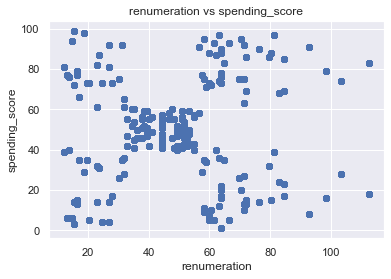

In [249]:
# Create a scatterplot with Matplotlib.

# Create scatterplot for the two columns.
plt.scatter(df2['renumeration'], df2['spending_score'])

# Add labels and a title to the plot.
plt.xlabel('renumeration')
plt.ylabel('spending_score')
plt.title('renumeration vs spending_score')

# Show plot. 
plt.show()


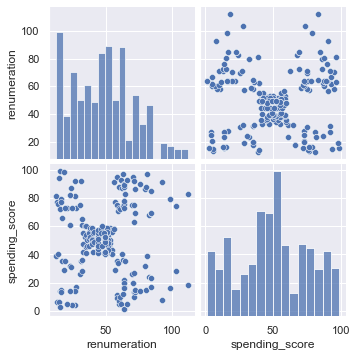

In [250]:
# Create a pairplot with Seaborn.
x = df2[['renumeration', 'spending_score']]

sns.pairplot(df2,
             vars=x)

## 3. Elbow and silhoutte methods

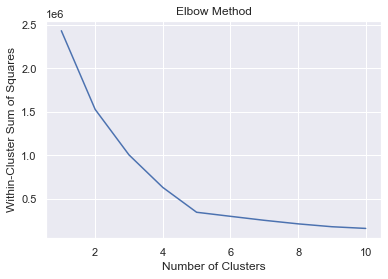

In [251]:
# Determine the number of clusters: Elbow method.
# Calculate the within-cluster sum of squares for different values of k.
wss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df2)
    wss.append(kmeans.inertia_)

# Plot the within-cluster sum of squares against the number of clusters.
plt.plot(range(1, 11), wss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares')

# Show the plot.
plt.show()

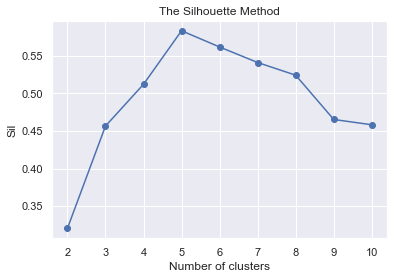

In [252]:
# Determine the number of clusters: Silhouette method.

# Find the range of clusters to be used using silhouette method.
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters=k).fit(x)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(x,
                                labels,
                                metric='euclidean'))

# Plot the silhouette method.
plt.plot(range(2, kmax+1),
         sil,
         marker='o')

# Insert labels and title.
plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")

plt.show()


## 4. Evaluate k-means model at different values of *k*

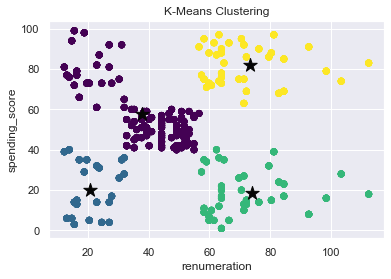

In [253]:
# Specify 4 clusters and fit the k-means model.
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=15000, n_init=10, random_state=0)
kmeans.fit(df2)

# Extract the cluster labels and centroids.
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Plot the clusters.
plt.scatter(df2['renumeration'], df2['spending_score'], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='#050505')
plt.xlabel('renumeration')
plt.ylabel('spending_score')
plt.title('K-Means Clustering')

# Show the plot
plt.show()

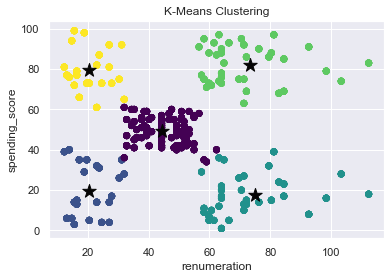

In [254]:
# Specify 5 clusters and fit the k-means model.
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=15000, n_init=10, random_state=0)
kmeans.fit(df2)

# Extract the cluster labels and centroids.
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Plot the clusters.
plt.scatter(df2['renumeration'], df2['spending_score'], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='#050505')
plt.xlabel('renumeration')
plt.ylabel('spending_score')
plt.title('K-Means Clustering')

# Show the plot
plt.show()

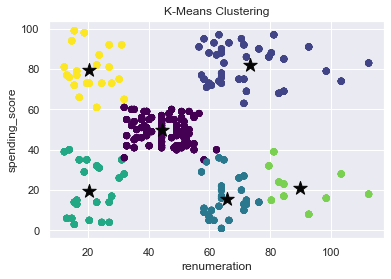

In [255]:
# Specify 6 clusters and fit the k-means model.
kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=15000, n_init=10, random_state=0)
kmeans.fit(df2)

# Extract the cluster labels and centroids.
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Plot the clusters.
plt.scatter(df2['renumeration'], df2['spending_score'], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='#050505')
plt.xlabel('renumeration')
plt.ylabel('spending_score')
plt.title('K-Means Clustering')

# Show the plot
plt.show()

## 5. Fit final model and justify your choice

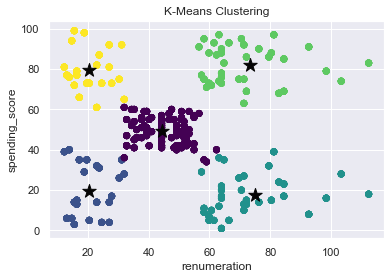

In [256]:
# Specify the number of clusters and fit the k-means model.
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=15000, n_init=10, random_state=0)
kmeans.fit(df2)

# Extract the cluster labels and centroids.
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Plot the clusters.
plt.scatter(df2['renumeration'], df2['spending_score'], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='#050505')
plt.xlabel('renumeration')
plt.ylabel('spending_score')
plt.title('K-Means Clustering')

# Show the plot
plt.show()

#### Notes:
5 clusters is definitely the best fit.

In [257]:
# Get the cluster assignments for each data point.
cluster_assignments = kmeans.labels_

# Compute the mean and standard deviation of each variable for each cluster.
cluster_means = pd.DataFrame(df2).groupby([cluster_assignments]).mean()
cluster_sds = pd.DataFrame(df2).groupby([cluster_assignments]).std()

# Compute the size of each cluster.
cluster_sizes = pd.Series([len(np.where(cluster_assignments == i)[0]) for i in range(kmeans.n_clusters)], index=range(kmeans.n_clusters))


In [258]:
# Print the results.
print("Cluster Means:")
print(cluster_means)
print("Cluster Standard Deviations:")
print(cluster_sds)
print("Cluster Sizes:")
print(cluster_sizes)

Cluster Means:
   renumeration  spending_score
0     44.418786       49.529716
1     20.424354       19.763838
2     74.831212       17.424242
3     73.240281       82.008427
4     20.353680       79.416357
Cluster Standard Deviations:
   renumeration  spending_score
0      7.088279        6.484414
1      5.719723       12.666796
2     13.638540        9.515402
3     13.557856        9.342765
4      5.737253       10.395781
Cluster Sizes:
0    774
1    271
2    330
3    356
4    269
dtype: int64


## 6. Plot and interpret the clusters

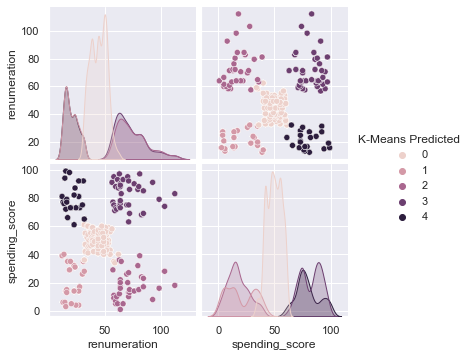

In [259]:
# Plot using the chosen number of clusters.
kmeans = KMeans(n_clusters = 5,
               max_iter = 15000,
               init='k-means++',
               random_state = 0).fit(df2)

clusters = kmeans.labels_

df2['K-Means Predicted'] = clusters

sns.pairplot(df2, hue='K-Means Predicted',
            diag_kind='kde');


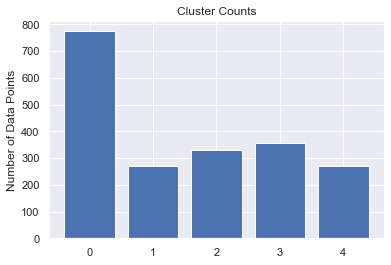

In [260]:
# Check the number of observations per predicted class.
df2['K-Means Predicted'].value_counts()

# Get the cluster assignments for each data point
cluster_assignments = kmeans.labels_

# Count the number of data points in each cluster
cluster_counts = np.bincount(cluster_assignments)

# Create a bar plot of the cluster counts
plt.bar(range(kmeans.n_clusters), cluster_counts)

# Set the x-axis labels to the cluster numbers
plt.xticks(range(kmeans.n_clusters))

# Set the y-axis label to the number of data points
plt.ylabel("Number of Data Points")

# Set the plot title
plt.title("Cluster Counts")

# Show the plot
plt.show()

<AxesSubplot:xlabel='spending_score', ylabel='renumeration'>

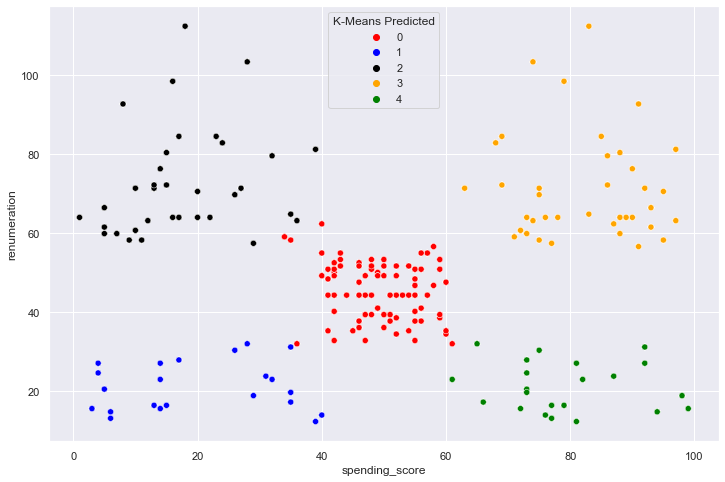

In [261]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

# Create a scatterplot.
sns.scatterplot(x='spending_score' , 
                y ='renumeration',
                data=df2,
                hue='K-Means Predicted',
                palette=['red', 'blue', 'black','orange','green'])

## 7. Discuss: Insights and observations

Cluster 0 has the most frequencies

Clusters 2 and 4 can be targeted for marketing

# Week 3 assignment: NLP using Python
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked you to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website. Therefore, you need to apply NLP on the data set.

## Instructions
1. Load and explore the data. 
    1. Sense-check the DataFrame.
    2. You only need to retain the `review` and `summary` columns.
    3. Determine if there are any missing values.
2. Prepare the data for NLP
    1. Change to lower case and join the elements in each of the columns respectively (`review` and `summary`).
    2. Replace punctuation in each of the columns respectively (`review` and `summary`).
    3. Drop duplicates in both columns (`review` and `summary`).
3. Tokenise and create wordclouds for the respective columns (separately).
    1. Create a copy of the DataFrame.
    2. Apply tokenisation on both columns.
    3. Create and plot a wordcloud image.
4. Frequency distribution and polarity.
    1. Create frequency distribution.
    2. Remove alphanumeric characters and stopwords.
    3. Create wordcloud without stopwords.
    4. Identify 15 most common words and polarity.
5. Review polarity and sentiment.
    1. Plot histograms of polarity (use 15 bins) for both columns.
    2. Review the sentiment scores for the respective columns.
6. Identify and print the top 20 positive and negative reviews and summaries respectively.
7. Include your insights and observations.

## 1. Load and explore the data

In [262]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt
import string


# nltk.download ('punkt').
# nltk.download ('stopwords').

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [263]:
# Import the data.
sentiments = pd.read_csv('clean_reviews.csv', usecols=['review', 'summary'])

# View the output.
print(sentiments.info())
print(sentiments.describe())
sentiments.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   review   2000 non-null   object
 1   summary  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB
None
         review     summary
count      2000        2000
unique     1980        1432
top     love it  Five Stars
freq          5         378


,review,summary
0,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,As my review of GF9's previous screens these w...,Money trap


In [264]:
# Determine if there are any missing values.
print(sentiments.isna().sum())

review     0
summary    0
dtype: int64


## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [265]:
# Review: Change all to lower case and join with a space.
sentiments['review'] = sentiments['review'].str.lower()

In [266]:
# Summary: Change all to lower case and join with a space.
sentiments['summary'] = sentiments['summary'].str.lower()

### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [267]:
sentiments.head()

,review,summary
0,"when it comes to a dm's screen, the space on t...",the fact that 50% of this space is wasted on a...
1,an open letter to galeforce9*:\n\nyour unpaint...,another worthless dungeon master's screen from...
2,"nice art, nice printing. why two panels are f...","pretty, but also pretty useless"
3,amazing buy! bought it as a gift for our new d...,five stars
4,as my review of gf9's previous screens these w...,money trap


In [268]:
# Replace all the punctuations in review column.
# Define the translation table with punctuation marks replaced by spaces
translator = str.maketrans('', '', string.punctuation)

# Apply the translation to a specific column in the DataFrame
sentiments['review'] = sentiments['review'].apply(lambda x: x.translate(translator))

# View output.
sentiments.head()

,review,summary
0,when it comes to a dms screen the space on the...,the fact that 50% of this space is wasted on a...
1,an open letter to galeforce9\n\nyour unpainted...,another worthless dungeon master's screen from...
2,nice art nice printing why two panels are fil...,"pretty, but also pretty useless"
3,amazing buy bought it as a gift for our new dm...,five stars
4,as my review of gf9s previous screens these we...,money trap


In [269]:
# Replace all the puncuations in summary column.
# Define the translation table with punctuation marks replaced by spaces
translator = str.maketrans('', '', string.punctuation)

# Apply the translation to a specific column in the DataFrame
sentiments['summary'] = sentiments['summary'].apply(lambda x: x.translate(translator))

# View output.
sentiments.head()


,review,summary
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,an open letter to galeforce9\n\nyour unpainted...,another worthless dungeon masters screen from ...
2,nice art nice printing why two panels are fil...,pretty but also pretty useless
3,amazing buy bought it as a gift for our new dm...,five stars
4,as my review of gf9s previous screens these we...,money trap


### 2c) Drop duplicates in both columns

In [270]:
# Find duplicates based on both columns.
duplicates = sentiments.duplicated(subset=['review', 'summary'], keep=False)

# Print the duplicate rows.
print(sentiments[duplicates])

                               review     summary
43                          i love it  five stars
48                            love it  five stars
55                              great  five stars
78                       good product  five stars
94                              great  five stars
294                              good  five stars
326                           love it  five stars
371                             great  five stars
404                              good  five stars
408                             great  five stars
416                           love it  five stars
430                           love it  five stars
576                             great  five stars
702                        love these  five stars
779                        great game  five stars
810                        great game  five stars
811                        great game  five stars
933                           awesome  five stars
954                    best game ever  five stars


In [271]:
# Drop duplicates.
sentiments = sentiments.drop_duplicates(subset=['review', 'summary'])

# Preview data.
sentiments.reset_index(inplace=True)
sentiments.head()

,index,review,summary
0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,1,an open letter to galeforce9\n\nyour unpainted...,another worthless dungeon masters screen from ...
2,2,nice art nice printing why two panels are fil...,pretty but also pretty useless
3,3,amazing buy bought it as a gift for our new dm...,five stars
4,4,as my review of gf9s previous screens these we...,money trap


In [272]:
sentiments.shape

(1961, 3)

## 3. Tokenise and create wordclouds

#### REVIEW COLUMN

In [273]:
# Load the review column.
review_column = sentiments['review']

# Convert the text in the column to lowercase and remove punctuation.
review_column = review_column.apply(lambda x: re.sub(r'[^\w\s]', '', x.lower()))

# Tokenize the text in the column and remove stop words.
stop_words = set(stopwords.words('english'))
tokenized_review_column = review_column.apply(lambda x: [word for word in word_tokenize(x) if word not in stop_words])

# Calculate the frequency distribution of words.
all_review_words = []
for words in tokenized_review_column:
    all_review_words += words
freq_dist = FreqDist(all_review_words)
print(freq_dist.most_common(15))  # print the 15 most common words

[('game', 1671), ('great', 580), ('fun', 552), ('one', 530), ('play', 502), ('like', 414), ('love', 323), ('really', 319), ('get', 319), ('cards', 301), ('tiles', 297), ('time', 291), ('good', 289), ('would', 280), ('book', 273)]


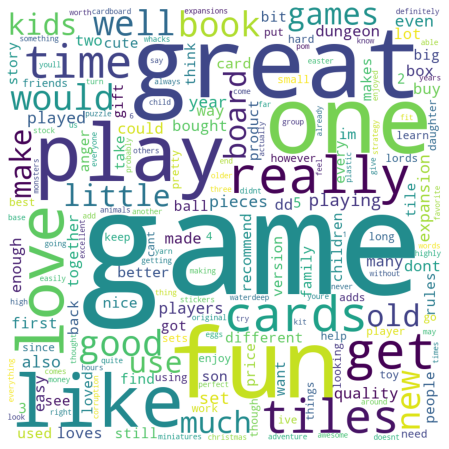

In [274]:
# Visualize the word cloud.
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate_from_frequencies(freq_dist)
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#### Identify 15 most common words used in the Review column

In [275]:
# Import the Counter class.
from collections import Counter

# Generate a DataFrame from Counter.
counts = pd.DataFrame(Counter(all_review_words).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Define a function to extract a polarity score for the review column.
def generate_polarity(review):
    return TextBlob(review).sentiment[0]

# Populate a new column with polarity scores for each review.
sentiments['polarity'] = sentiments['review'].apply(generate_polarity)

# Preview the result.
sentiments['polarity'].head()

0   -0.036111
1    0.035952
2    0.116640
3    0.578788
4   -0.316667
Name: polarity, dtype: float64

In [276]:
# Preview data.
counts

,Frequency
Word,
game,1671
great,580
fun,552
one,530
play,502
like,414
love,323
really,319
get,319


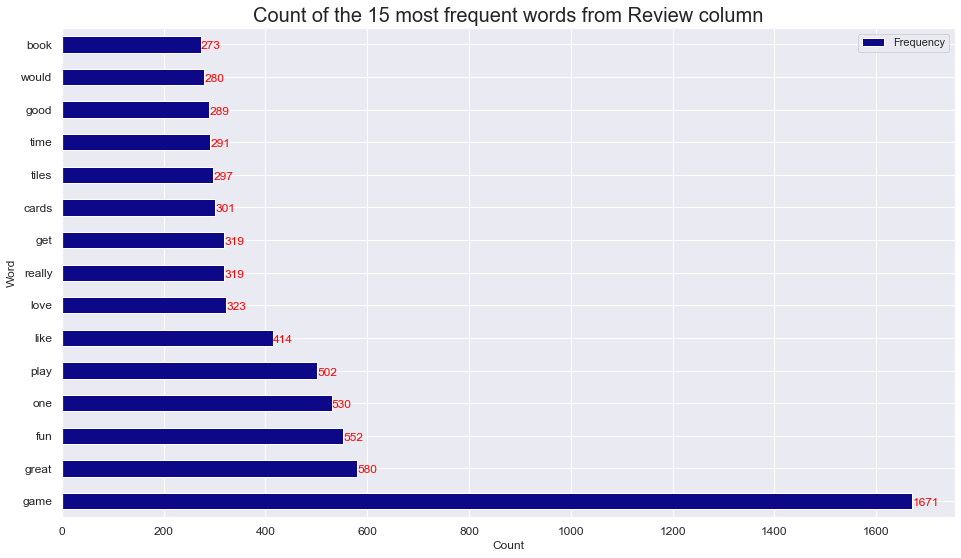

In [277]:
# Set the plot type.
ax = counts.plot(kind='barh', figsize=(16, 9), fontsize=12,
                 colormap ='plasma')

# Set the labels.
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Word', fontsize=12)
ax.set_title("Count of the 15 most frequent words from Review column",
             fontsize=20)

# Draw the bar labels.
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)),
            fontsize=12, color='red')

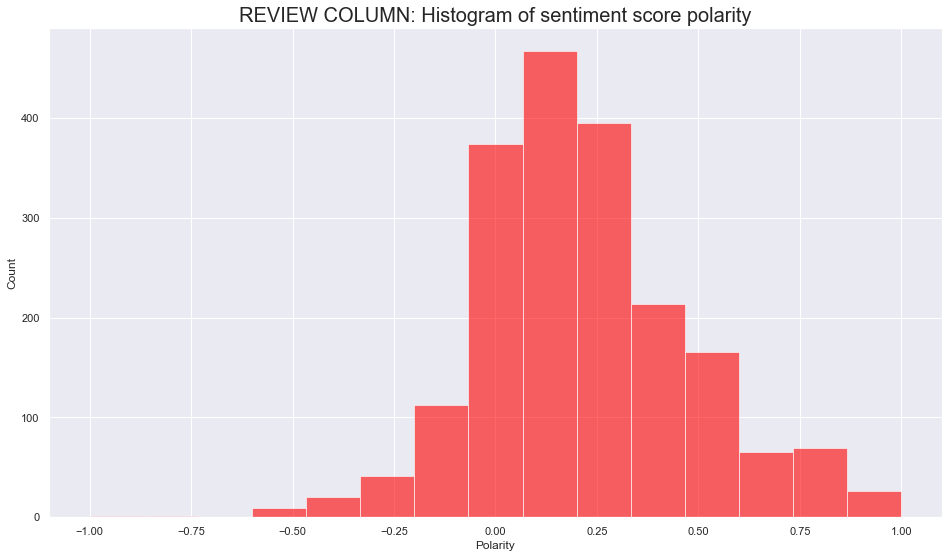

In [278]:
# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(sentiments['polarity'], num_bins, facecolor='red', alpha=0.6)
        
# Set the labels. 
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('REVIEW COLUMN: Histogram of sentiment score polarity', fontsize=20)

plt.show()

#### SUMMARY COLUMN

In [279]:
# Load the summary column.
summary_column = sentiments['summary']

# Convert the text in the column to lowercase and remove punctuation.
summary_column = summary_column.apply(lambda x: re.sub(r'[^\w\s]', '', x.lower()))

# Tokenize the text in the column and remove stop words.
stop_words = set(stopwords.words('english'))
tokenized_summary_column = summary_column.apply(lambda x: [word for word in word_tokenize(x) if word not in stop_words])

# Calculate the frequency distribution of words.
all_summary_words = []
for words in tokenized_summary_column:
    all_summary_words += words
freq_dist1 = FreqDist(all_summary_words)

print(freq_dist1.most_common(15))  # print the 15 most common words

[('stars', 427), ('five', 342), ('game', 319), ('great', 295), ('fun', 218), ('love', 93), ('good', 92), ('four', 58), ('like', 54), ('expansion', 52), ('kids', 50), ('cute', 45), ('book', 43), ('one', 38), ('awesome', 36)]


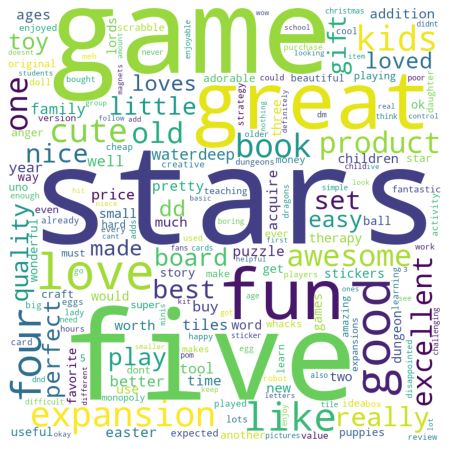

In [280]:
# Visualize the word cloud.
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate_from_frequencies(freq_dist1)
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


In [281]:
# Import the Counter class.
from collections import Counter

# Generate a DataFrame from Counter.
counts2 = pd.DataFrame(Counter(all_summary_words).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Define a function to extract a polarity score for the summary column.
def generate_polarity(summary):
    return TextBlob(summary).sentiment[0]

# Populate a new column with polarity scores for each review.
sentiments['polarity'] = sentiments['summary'].apply(generate_polarity)

# Preview the result.
sentiments['polarity'].head()

0    0.15
1   -0.80
2    0.00
3    0.00
4    0.00
Name: polarity, dtype: float64

In [282]:
# Preview data.
counts2

,Frequency
Word,
stars,427
five,342
game,319
great,295
fun,218
love,93
good,92
four,58
like,54


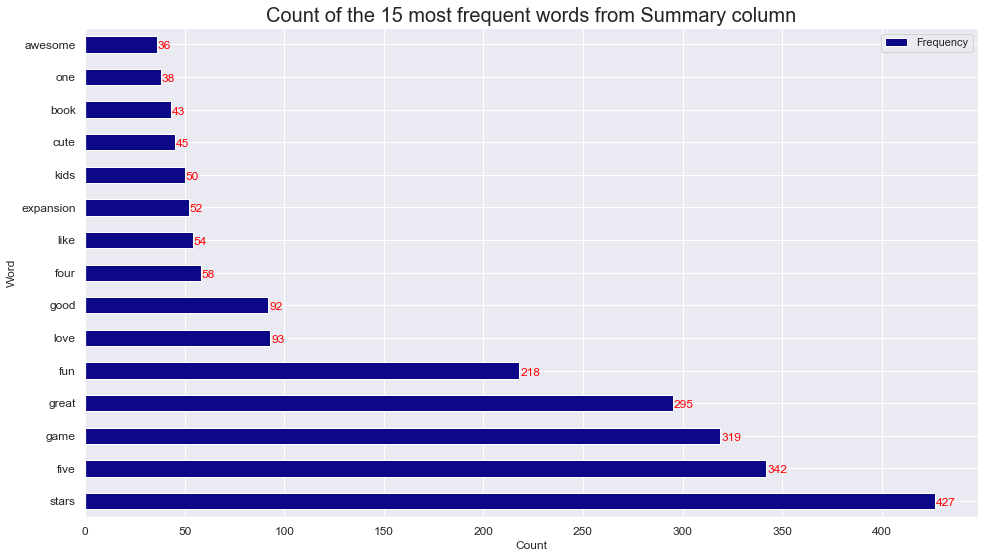

In [283]:
# Set the plot type.
ax2 = counts2.plot(kind='barh', figsize=(16, 9), fontsize=12,
                 colormap ='plasma')

# Set the labels.
ax2.set_xlabel('Count', fontsize=12)
ax2.set_ylabel('Word', fontsize=12)
ax2.set_title("Count of the 15 most frequent words from Summary column",
             fontsize=20)

# Draw the bar labels.
for i in ax2.patches:
    ax2.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)),
            fontsize=12, color='red')

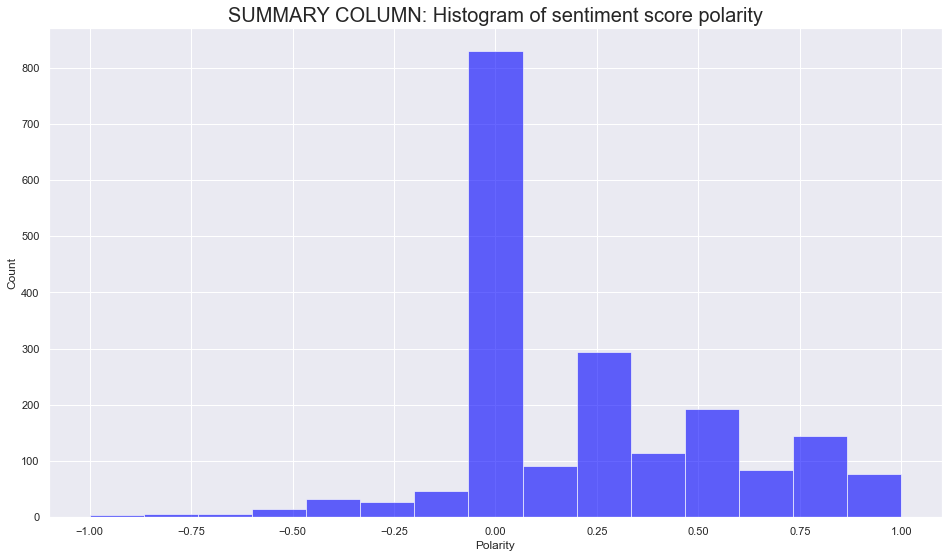

In [284]:
# Define a function to extract a polarity score for the summary.
def generate_polarity(summary):
    return TextBlob(summary).sentiment[0]

# Populate a new column with polarity scores for each summary.
sentiments['polarity'] = sentiments['summary'].apply(generate_polarity)

# Preview the result.
sentiments['polarity'].head()

# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(sentiments['polarity'], num_bins, facecolor='blue', alpha=0.6)

# Set the labels. 
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('SUMMARY COLUMN: Histogram of sentiment score polarity', fontsize=20)

plt.show()

In [285]:
# Mean polarity.
sentiments.polarity.mean()

0.22367835260523988

Text(0.5, 1.0, 'Histogram of sentiment score polarity')

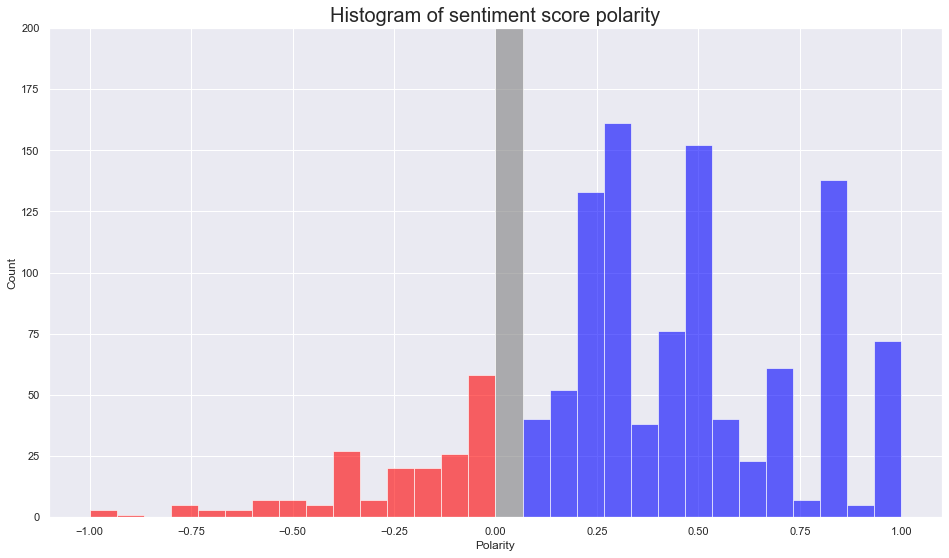

In [286]:
# Set the number of bins.
num_bins = 30

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(sentiments['polarity'], num_bins,facecolor = 'grey', alpha=0.6)

# Highlight positive sentiment in blue
for patch in patches:
    if patch.get_x() > 0.05:
        patch.set_facecolor("blue")
    elif patch.get_x() < -0.05:
        patch.set_facecolor("red")

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.ylim([0, 200])  # Set the maximum y-axis value to 200
plt.title('Histogram of sentiment score polarity', fontsize=20)

### Notes:
The histogram of the overall polarity score shows a distribution that is right skewed which can mean that the general sentiment of the customers is positive. 

## 6. Identify top 20 positive and negative reviews and summaries respectively

In [287]:
# Top 20 Positive Reviews

# Sort the dataset by polarity score in descending order.
sorted_data = sentiments.sort_values(by='polarity', ascending=False)

# Select the top 20 positive reviews and summaries.
top_positive = sorted_data[sorted_data['polarity'] > 0][:20]
print("Top 20 Positive Reviews and Summaries:")
print(top_positive[['review', 'summary']])


Top 20 Positive Reviews and Summaries:
                                                 review  \
1014        include all items   got the package quickly   
1899  quick fun easy to learn wide age range fast pl...   
805   love this game and have been playing it for ov...   
1601  received item todaysuper fast shipment i cant ...   
162   this was a christmas present for a nephew who ...   
1152  just what i needed for my collection group of ...   
1367  love this can expand current game with some ne...   
1062  if you have anyone in your life that enjoys bo...   
139   i bought 8 of these for my 3 year old daughter...   
1153  easy to understand quick start hours of fun wi...   
639   beautiful we look forward to the easter story ...   
643   we have several different sets of these magnet...   
1465  my 5 yearold son absolutely loves this game  h...   
1067  this is in my opinion the best dungeon crawler...   
649   my son is 2 years and 4 months  he is a little...   
968   loads of fu

In [288]:
# Top 20 Negative Reviews

# Select the top 20 negative reviews and summaries.
top_negative = sorted_data[sorted_data['polarity'] < 0][:20]
print("\nTop 20 Negative Reviews and Summaries:")
print(top_negative[['review', 'summary']])



Top 20 Negative Reviews and Summaries:
                                                 review  \
1829  this is a fun game for anyone old enough to sp...   
779   a little tricky to learn but very fun game onc...   
1840  a very useful addition to the quddler game tak...   
587   had a very hard time opening the last super th...   
1089  overall i love this board game i havent played...   
14    it sounded like a really amazing concept but w...   
12    this is a campaign specific dm screen meant to...   
1049  the playing pieces are of better quality than ...   
252   cool craft but is a lot of work and quite mess...   
1894  this is such a fun game if you are a words per...   
1844  fun game  cross between scrabble and gin rummy...   
980   i own all 4 of the dungeons and dragons advent...   
1535  we were a little reticent about this game when...   
941   while it is fun to play the traditional dd tab...   
506   my counseling students in elementary and middl...   
400   my son has

In [289]:
sentiments.head()

,index,review,summary,polarity
0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...,0.15
1,1,an open letter to galeforce9\n\nyour unpainted...,another worthless dungeon masters screen from ...,-0.80
2,2,nice art nice printing why two panels are fil...,pretty but also pretty useless,0.00
3,3,amazing buy bought it as a gift for our new dm...,five stars,0.00
4,4,as my review of gf9s previous screens these we...,money trap,0.00


### Gather insights into the reviews.

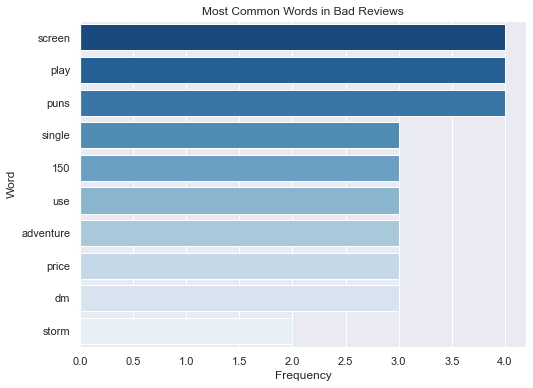

In [294]:
# Filter for only bad reviews
bad_reviews = sentiments[sentiments['polarity'] < 0][:5]

# Remove stop words
stop_words = set(stopwords.words('english'))
bad_reviews['review'] = bad_reviews['review'].apply(lambda x: ' '.join([word for word in x.lower().split() if word not in stop_words]))

# Compute the most common words in the bad reviews
bad_review_words = pd.Series(' '.join(bad_reviews['review']).split())
bad_review_word_counts = bad_review_words.value_counts().head(10)

# Create a bar plot of the most common words in the bad reviews
plt.figure(figsize=(8,6))
sns.barplot(bad_review_word_counts.values, bad_review_word_counts.index, palette='Blues_r')
plt.title('Most Common Words in Bad Reviews')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()


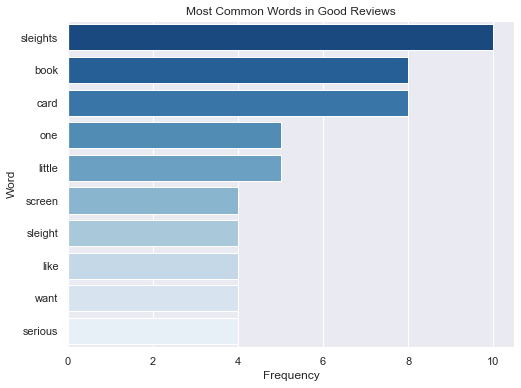

In [293]:
# Filter for only good reviews
good_reviews = sentiments[sentiments['polarity'] > 0][:10]

# Remove stop words
stop_words = set(stopwords.words('english'))
good_reviews['review'] = good_reviews['review'].apply(lambda x: ' '.join([word for word in x.lower().split() if word not in stop_words]))

# Compute the most common words in the good reviews
good_review_words = pd.Series(' '.join(good_reviews['review']).split())
good_review_word_counts = good_review_words.value_counts().head(10)

# Create a bar plot of the most common words in the good reviews
plt.figure(figsize=(8,6))
sns.barplot(good_review_word_counts.values, good_review_word_counts.index, palette='Blues_r')
plt.title('Most Common Words in Good Reviews')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()



### Notes:
There are some negative sentiments towards the words "screen", "play" and "puns". We cannot deduce what this analysis can imply but we would suggest further investigation on products that contain screens to determine what negative sentiments are being shared towards those particular products. 

There are some positive sentiments towards the words "sleights", "book", and "card".  Further investigation is recommended to find out which products these sentiments were referring to and maybe those products can be used to target marketing campaigns for an increase in positive sentiments on the web.

Without metadata on the product names, we cannot ascertain which products.
